In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("heart5(4).csv")

In [3]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.00000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000
mean,54.950187,0.700187,0.931196,132.139166,247.237547,0.14726,0.514944,150.501245,0.349938,1.231569,1.388543,0.763699,2.333748,0.498132
std,9.349440,0.458247,1.034713,17.739690,51.261774,0.35442,0.526555,23.092700,0.477024,1.184287,0.611093,1.022885,0.622985,0.500074
min,28.000000,0.000000,0.000000,93.000000,126.000000,0.00000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.00000,0.000000,134.000000,0.000000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,242.000000,0.00000,1.000000,154.000000,0.000000,0.900000,1.000000,0.000000,2.000000,0.000000
75%,62.000000,1.000000,2.000000,140.000000,277.000000,0.00000,1.000000,167.000000,1.000000,1.900000,2.000000,1.000000,3.000000,1.000000
max,80.000000,1.000000,3.000000,202.000000,565.000000,1.00000,2.000000,205.000000,1.000000,6.500000,2.000000,4.000000,4.000000,1.000000


In [4]:
dataset.isnull().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset.duplicated().sum()

9

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:

infer = dataset.describe()
df=dataset
df2 = df[df.trestbps < infer.loc["mean", "trestbps"] + 3 * infer.loc["std", "trestbps"]]
df3 = df2[df.chol < infer.loc["mean", "chol"] + 3 * infer.loc["std", "chol"]]
df4 = df3[df.thalach > infer.loc["mean", "thalach"] - 3 * infer.loc["std", "thalach"]]
df5 = df4[df.age < infer.loc["mean", "age"] + 3 * infer.loc["std", "age"]]
df_new = df5[df.oldpeak > infer.loc["mean", "oldpeak"] - 3 * infer.loc["std", "oldpeak"]]
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,2,1
1,64,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,65,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,66,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,67,0,0,120,354,0,1,163,1,0.6,2,0,2,1


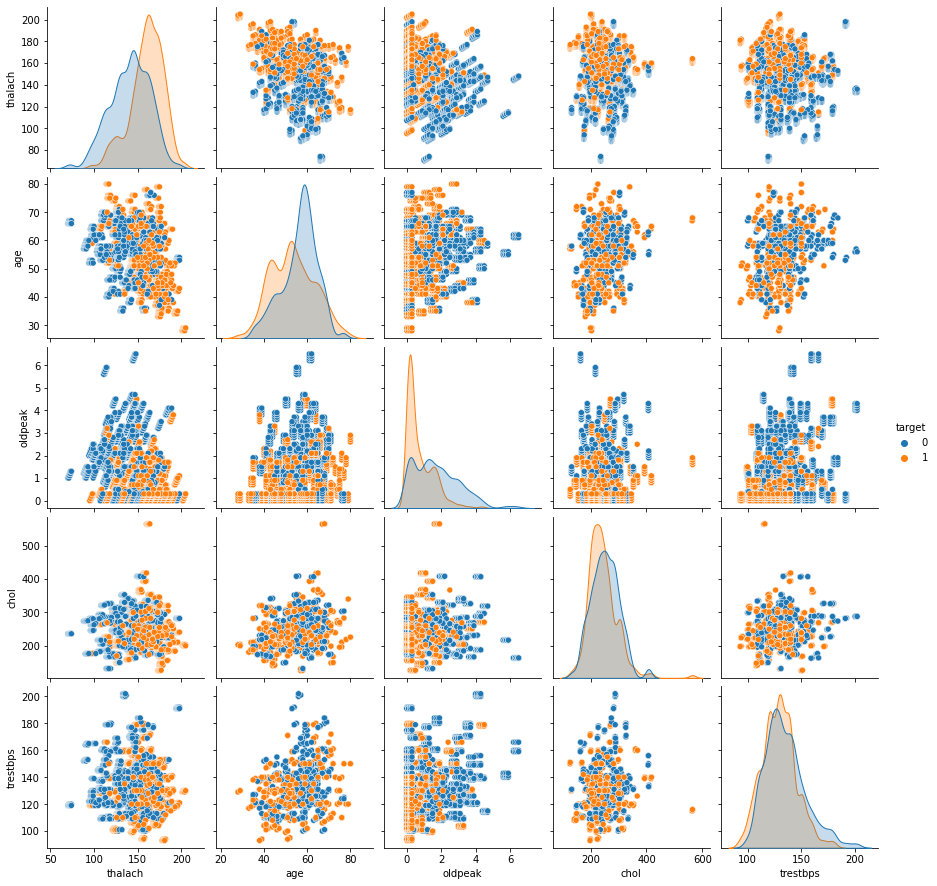

In [9]:
d1=dataset[["thalach","age","oldpeak","chol","trestbps","target"]]
sns.pairplot(data = d1 ,hue="target")

In [10]:
df_new.cp = df_new.cp.map({0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"})
df_new.sex = df_new.sex.map({0:"Female", 1:"Male"}) 
df_new.exang = df_new.exang.map({0:"exercise did not induce angina", 1:"exercise induced angina"})
df_new.slope = df_new.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
df_new.thal = df_new.thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
df_new = pd.get_dummies(df_new, drop_first = True)
dataset=df_new
df_new.head(10)

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,exang_exercise induced angina,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,0,150,2.3,1,1,1,0,1,0,0,0,0,0
1,64,130,250,0,1,187,3.5,0,1,1,1,0,0,0,0,0,0
2,65,130,204,0,0,172,1.4,0,1,0,0,0,1,0,0,0,0
3,66,120,236,0,1,178,0.8,0,1,1,0,0,1,0,0,0,0
4,67,120,354,0,1,163,0.6,0,1,0,0,0,0,1,0,0,0
5,68,140,192,0,1,148,0.4,0,1,1,0,0,0,0,1,1,0
6,69,140,294,0,0,153,1.3,0,1,0,0,0,1,0,1,0,0
7,70,120,263,0,1,173,0.0,0,1,1,0,0,1,0,0,0,1
8,71,172,199,1,1,162,0.5,0,1,1,1,0,0,0,0,0,1
9,72,150,168,0,1,174,1.6,0,1,1,1,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2,random_state=1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [16]:
Test_data = [[64,151,289,0,0,152,0.5,0,1,0,1,1,1,0,1,0]]
pred=knn.predict(Test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
pred

array([0])

In [19]:
pred_lr=knn.predict(X_test)
pred_lr

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

Result:

Accuracy Score: 99.52%


CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.990099    1.000000    0.9952    0.995050      0.995248
recall       1.000000    0.990769    0.9952    0.995385      0.995200
f1-score     0.995025    0.995363    0.9952    0.995194      0.995201
support    300.000000  325.000000    0.9952  625.000000    625.000000


Confusion Matrix: 
 [[300   0]
 [  3 322]]



      Real  Predict
3037     0        0
112      1        1
1072     0        0
528      0        0
349      1        1
...    ...      ...
1412     0        0
1608     1        1
1488     0        0
1647     1        1
2463     1        1

[625 rows x 2 columns]




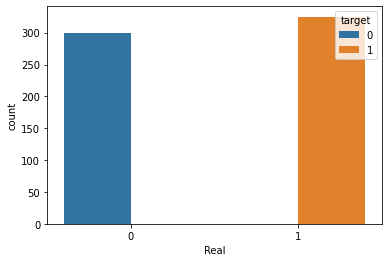

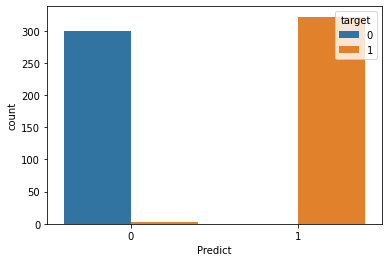

In [23]:
        from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
        pred = knn.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Result:\n")
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("\n")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("\n")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")
        print("\n")
        output=pd.DataFrame({'Real':Y_test, 'Predict':pred})
        print(output)
        print("\n")
        sns.countplot(x='Real',hue=dataset['target'],data=output)
        plt.show()
        sns.countplot(x='Predict',hue=dataset['target'],data=output)
        plt.show()
          


In [25]:
import pickle
pickle.dump(knn, open('model.pkl','wb'))